# Gathering data 

## Gathering is the first step in data wrangling. Where we will gather data from different sources 

### Input data sources :

1. **Enhanced Twitter Archive.csv :** this file was `downloaded manually` into the directory of the project.  

2. [**Image Predictions File (.tsv)**](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) **:** this is a file contaning prediction data about the dogs from running the tweets images through neural network and other info is given too, this file will be downloaded programmatically using the `Requests` library.      
3. **Additional Data via the Twitter API :** Be it more information about each tweent in the given period like (retweet count and favorite ("like") count at minimum, and any additional data you find interesting), this   should be handled through `tweepy using tweeter developer account`, __or__ manually through `tweet-json.txt` file provided.   
    


### Output data files :

1. __enhanced_archive_df__
2. __Image_predictions_df__ & image-predictions.tsv
3. __Tweet_json.txt / api_df__


In [1]:
# importing all needed libraries

import pandas as pd 
import numpy as np
import tweepy
import requests
import json
import os
import datetime 
import re           # Regular expression operations
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
% matplotlib inline

### 1. importing the `Enhanced Twitter Archive.csv`

In [2]:
# 1. importing the `Enhanced Twitter Archive.csv` into a pandas df
enhanced_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### 2. programmatically download the `Image Predictions File.tsv`

In [3]:
# 2. code for programmatically download the `Image Predictions File.tsv` into the workspace directory using `request`

# the file provided URL.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# getting the file name using split
file_name = url.split('/')[-1]
# Get your response object by using the requests package
response = requests.get(url)
# Downloading and saving the image prediction data using Requests
with open(file_name, mode='wb') as file :
    file.write(response.content)

# finally importing image predection.tsv file into a df.
image_predictions_df = pd.read_csv(file_name, sep ='\t')

### 3. Additional Data via the Twitter API 
#### For now we gonna access the project data without a twitter account as we have problems with the twitter developer account

In [4]:
# 1. accessing the Twitter data without actually creating a Twitter account:
# This code is the Twitter API code provided in the project lesson to gather some of the required data for the project. 
# after understanding how the code works, here is a copy in the notebook.

while False : # please don't run this as it can mess up the tweet_json.txt file in use
    from tweepy import OAuthHandler
    from timeit import default_timer as timer

    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = enhanced_archive_df.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # don't run every time
    if not os.path.isfile('tweet_json.txt'):
        # Save each tweet's returned JSON as a new line in a .txt file
        with open('tweet_json.txt', 'w') as outfile:
            # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
            for tweet_id in tweet_ids:
                count += 1
                print(str(count) + ": " + str(tweet_id))
                try:
                    tweet = api.get_status(tweet_id, tweet_mode='extended')
                    print("Success")
                    json.dump(tweet._json, outfile)
                    outfile.write('\n')
                except tweepy.TweepError as e:
                    print("Fail")
                    fails_dict[tweet_id] = e
                    pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [5]:
# 2. Reading the resulting `tweet_json.txt` file line by line into a pandas DataFrame 
# we selected data about tweet ID, retweet count, followers_count, and favorite count.

# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

#Reading line by line from the 'tweet_json.txt' file to extract the data we need.
with open('tweet_json.txt') as json_file:
    for line in json_file:
        line_json_data = json.loads(line)
        id_ = line_json_data['id']
        followers = line_json_data['user']['followers_count']
        retweets = line_json_data['retweet_count']
        likes = line_json_data['favorite_count']
        # Append to list of dictionaries that will make our df
        df_list.append({'tweet_id': id_,
                        'followers_count': int(followers),
                        'retweet_count': int(retweets),
                        'favorite_count': int(likes)})
        
# Create DataFrame from list of dictionaries
api_df = pd.DataFrame(df_list, columns = ['tweet_id', 'followers_count', 'retweet_count', 'favorite_count'])

# Assessing data 

## Assessing is the second step in data wrangling. Where the inspection of our collected data sets from both the Quality and Tidiness perspectives will be conducted.

### Input data :

1. __enhanced_archive_df__
2. __image_predictions_df__ 
3. __api_df__  

### Process :
#### `Two types of assessment are used`:
&nbsp;  
1. `Visual assessment`: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
2. `Programmatic assessment`: pandas' functions and/or methods are used to assess the data.

### Output  : 
#### `Assessment Summary report containing :` 

1. At least eight (8) data quality issues
2. At least two (2) tidiness issues

## Visual assessment

In [8]:
# visually inspecting enhanced_archive_df.
enhanced_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# visually inspecting image_predictions_df.
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# visually inspecting api_df.
api_df.head()

,tweet_id,followers_count,retweet_count,favorite_count
0,892420643555336193,3200889,8853,39467
1,892177421306343426,3200889,6514,33819
2,891815181378084864,3200889,4328,25461
3,891689557279858688,3200889,8964,42908
4,891327558926688256,3200889,9774,41048


## Programmatic assessment

In [11]:
# Programmatically inspecting enhanced_archive_df.
enhanced_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
enhanced_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
enhanced_archive_df.duplicated().sum()

0

In [14]:
# names are missing values "None" and some don't make sense "a" , "the", "an" , "officially"
enhanced_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
an             7
Bailey         7
Jax            6
Milo           6
Leo            6
Oscar          6
Koda           6
Bella          6
Rusty          6
Scout          6
Stanley        6
Dave           6
Jack           6
Louis          5
            ... 
Pip            1
Billy          1
Timmy          1
Benny          1
Willow         1
Amber          1
Zeus           1
Jessifer       1
Staniel        1
Gin            1
Cilantro       1
Timofy         1
Fletcher       1
Duchess        1
Hector         1
Bronte         1
his            1
Emanuel        1
Kota           1
Grizzwald      1
Keet           1
Kirk           1
Nida           1
Taco           1
Brandy         1
Tove           1
Herb           1
Hall          

In [15]:
enhanced_archive_df.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = enhanced_archive_df[(enhanced_archive_df['doggo'] != 'None') & (enhanced_archive_df['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:]

# there are dogs with two classifications

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
778,doggo,None,pupper,None
822,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None


In [17]:
# rating_denominator values do not have to be all 10s
print(enhanced_archive_df.rating_denominator.value_counts())

#rating_numerator have values less than 10 are propaply nt dogs tweets
print(enhanced_archive_df.rating_numerator.value_counts())

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [18]:
#timestamp are more all pesent in string formate could be changed to date time formate and stored in deffirent colomns
enhanced_archive_df.timestamp.value_counts()

2017-01-04 17:27:59 +0000    1
2016-03-03 16:23:38 +0000    1
2016-06-28 04:31:44 +0000    1
2017-05-30 16:49:31 +0000    1
2016-01-23 02:53:03 +0000    1
2015-11-16 02:38:37 +0000    1
2017-04-10 00:06:42 +0000    1
2016-07-13 00:43:15 +0000    1
2016-03-29 00:12:05 +0000    1
2015-12-13 18:10:33 +0000    1
2016-07-12 00:27:52 +0000    1
2017-04-11 00:24:08 +0000    1
2016-06-14 01:49:03 +0000    1
2017-04-26 02:41:43 +0000    1
2016-02-13 03:59:01 +0000    1
2016-04-30 01:41:23 +0000    1
2015-11-19 03:52:34 +0000    1
2015-12-12 03:29:35 +0000    1
2016-06-17 19:59:26 +0000    1
2015-11-28 03:21:24 +0000    1
2016-05-09 00:11:16 +0000    1
2016-02-10 03:22:44 +0000    1
2015-12-15 14:50:49 +0000    1
2017-01-15 04:56:16 +0000    1
2016-10-26 16:14:55 +0000    1
2015-12-11 16:40:19 +0000    1
2016-06-06 01:02:55 +0000    1
2016-01-29 02:17:12 +0000    1
2017-01-24 22:44:42 +0000    1
2016-01-21 02:34:07 +0000    1
                            ..
2017-03-31 00:27:14 +0000    1
2015-12-

In [19]:
# tweet_id inspection
enhanced_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions_df.duplicated().sum()

0

In [22]:
# programatically inspecting image_predictions_df.
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Getting all the tweets where the value of both 'p1_dog' and 'p2_dog' and 'p3_dog' is not none
nonunique_stage = image_predictions_df[(image_predictions_df['p1_dog'] == False ) & (image_predictions_df['p2_dog'] == False) & (image_predictions_df['p3_dog'] == False)]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -9:]

# there are 324 images that have are not dogs

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [24]:
# programatically inspecting api_df
api_df.info()
#all classes are int , all are complete 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [25]:
api_df.duplicated().sum()

0

In [26]:
# note the retweet_count and favorite_count with 0 counts are retweet or replays.
api_df.describe()

,tweet_id,followers_count,retweet_count,favorite_count
count,2.354000e+03,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3.200942e+06,3164.797366,8080.968564
std,6.852812e+16,4.457302e+01,5284.770364,11814.771334
min,6.660209e+17,3.200799e+06,0.000000,0.000000
25%,6.783975e+17,3.200898e+06,624.500000,1415.000000
50%,7.194596e+17,3.200945e+06,1473.500000,3603.500000
75%,7.993058e+17,3.200953e+06,3652.000000,10122.250000
max,8.924206e+17,3.201018e+06,79515.000000,132810.000000


In [27]:
enhanced_archive_df.query('tweet_id == 838085839343206401')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


In [28]:
api_df.query('retweet_count == 0') 

,tweet_id,followers_count,retweet_count,favorite_count
290,838085839343206401,3200891,0,150


## Assessment documentaion.
### Quality aspects:
#### __enhanced_archive_df__:
1. `Validity issue`: number of records are retweets and replaies, we only need tweets with images in them. `ok` 
2. `Validity issue`: number of records are tweets with no image prediction data in __"image_predictions_df"__.  `ok` 
3. `Completeness issue`: pets classification columns : "doggo", "floofer", "pupper" and "puppo" have missing data 'None'.
4. `Consistency issue`: __"name"__ feature needs consistant data for missing names : "None" and some don't make sense "a" , "the", "an" usually dog name is not mintioned in the tweet need to change all to 'null'. `ok`
5. `Accuracy issue`: __"name"__ feature have number of inaccurate names "a" , "the", "an", "O" to name a few. `ok`
7. `Accuracy issue`: __"name"__ feature have number of inaccurate names starting with lower case. `ok`
5. `Consistency`: __"time stamp"__ is in string formate should be changed to date time formate and stored in deffirent colomns. `ok`
6. `Use case validity issue`: Some columns that will not be of use in our analysis are: __"in_reply_to_status_id"__ , __"in_reply_to_user_id"__, __"retweeted_status_id"__, __"retweeted_status_user_id"__ and	__"retweeted_status_timestamp"__ . `ok`
7. `Completeness issue`: __"expanded_url"__ column of the archive_df have missing values for tweets without photos. `ok`

#### __image_predictions_df__:
1. more descriptive colomn names.`ok`
2. p1_dog, p2_dog and p3_dog, have 324 images that have are not dogs, all dog predections are False. `ok`
3. number of retweets and replaies are present and we only need tweets with images in them. Validity issue `ok`

#### __api_df__:

1. number of retweets, replaies and tweets that do not have image prediction present in the data frame and we only need tweets with images in them. Validity issue `ok`

### Tidiness aspects:
#### __enhanced_archive_df__:
1. "`values are column names`: pets classification features: __"doggo"__, __"floofer"__, __"pupper"__, __"puppo"__ should be in one colomn of (pet_class) of one or compination pet stage. `ok`

#### __image_predictions_df__:
1. __"image_predection_df__ Column headers are values, not variable names
    
#### __api_df__:
1. Two tables __"api_df"__ and __"enhanced_archive_df"__ have a common observation unit (the tweet it silfe) need to combined in one df. `ok`
 

# cleaning data

## define 
### quality issues resolving :
1. Removing all __archive_clean_df_1__ rows that does not contain imeges in __image_clean_df_1__. `(done)`
2. Removing all the rows that are retweets and replays in __archive_clean_df_1__. `(done)`
3. Removing all the rows that are retweets and replays in __image_clean_df_1__. `(done)`
4. Removing colomns (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) in __archive_clean_df_1__. `(done)`. 
10. removing __"expanded_url"__ column of missing values for tweets without photos. `done`
6. Removing all the rows that are retweets, replays and tweets without images from in __api_clean_df_1__. `done`
5. changing some __image_clean_df_1__ colomn names to a more descriptive names. `done` 
8. __name__ feature needs consistant data for missing names : "None". `done`
9. __name__ feature some data don't make sense "a" , "the", "an" ,( a dog name allways start with an upper case )usually dog name is not mintioned in the tweet need to change all to 'NA'. `done`
7. __timestamp__ colomn is in string formate will be changed to date time formate and stored in deffirent colomns. `done`
43. __"doggo"__, __"floofer"__, __"pupper"__, __"puppo"__ All "None" values will be changed to NaN `done`

### Tidiness issues resolving:
1.  pets classification features: __"doggo"__, __"floofer"__, __"pupper"__, __"puppo"__ will be in one colomn of (pet_class) of **{pupper, doggo, puppo, doggo-pupper, floofer, doggo-floofer, doggo-puppo}.** `done`
1. The two tables __"api_df"__ and __"enhanced_archive_df"__ will be merged. `done`
2. __"image_predection_df__ have values of predection algorithm __p1_dog__, __p2_dog__ and __p3_dog__ as colomn variables. `done`

#### - Note : The dataset has two observational units the first is the tweet (the archive and api datasets) and second is the images (the image prediction dataset).

## code

### taking a copy of the raw imported data frames 

In [29]:
archive_clean_df_1 = enhanced_archive_df.copy()
image_clean_df_1 = image_predictions_df.copy()
api_clean_df_1 = api_df.copy()

### 1. removing all rows from `archive_clean_df_1` with no images in `image_clean_df_1`.

In [30]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_clean_df_1.tweet_id.unique())

In [31]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_clean_df_1.tweet_id.isin(tweets_with_image).sum()

True

In [32]:
# Cleaning 'archive_clean_df_1'
archive_clean_df_1 = archive_clean_df_1[archive_clean_df_1.tweet_id.isin(tweets_with_image)]

### 2. Removing all the rows that are retweets and replays in `archive_clean_df_1`.

In [33]:
# using archive_clean_df_1 to extract the tweets that include data in the retweet_status_id.
retweets_entries = archive_clean_df_1.retweeted_status_id.notnull()

# Dropping the retweets from the archive_clean_df_1.
# invert here as the retweet_entries have true in the rows with retweets as false otherwise so we need the oppesit
archive_clean_df_1 = archive_clean_df_1[~retweets_entries] 

# Extracting replies entries with the same method as above
replies_entries = archive_clean_df_1.in_reply_to_status_id.notnull()

# Dropping the replies from the archive_clean_df_1.
archive_clean_df_1 = archive_clean_df_1[~replies_entries]

### 3. Removing all the rows that are retweets and replays in `image_clean_df_1`. 

In [34]:
# Dropping the retweets and replies ids from the image prediction dataframe :
# creating a list of tweet_ids in archive_clean_df_1 "tweets_with_image" and confirming its length
archive_tweets_id = list(archive_clean_df_1.tweet_id.unique())

# confirming that all the tweets in archive_tweets_id exist in the image_clean_df_1
print((len(archive_tweets_id) == image_clean_df_1.tweet_id.isin(archive_tweets_id).sum()))

# droping extra rows in image_clean_df_1.
image_clean_df_1 = image_clean_df_1[image_clean_df_1.tweet_id.isin(archive_tweets_id)]

True


### 4. Removing all unused colomns `archive_clean_df_1`. 

In [35]:
# list of colomns to drop
colomns_to_drop = ['in_reply_to_status_id' , 'in_reply_to_user_id', 
                   'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
# dropping unwanted colomns
archive_clean_df_1.drop(colomns_to_drop, axis = 1, inplace = True)

### 5. changing `image_clean_df_1` colomns names to more discriptive names

In [36]:
# changing some coloms names
rename_dic = {"p1": 'prediction_1', 'p1_conf': 'probability_1' ,  'p1_dog': 'dog_flage_1',
             'p2': 'prediction_2' , 'p2_conf': 'probability_2' ,  'p2_dog': 'dog_flage_2',
             'p3': 'prediction_3' , 'p3_conf': 'probability_3' ,  'p3_dog': 'dog_flage_3'}

image_clean_df_1.rename(rename_dic, axis = 'columns', inplace = True)


### 6. Removing records that are retweets, replays and tweets without images from in __api_clean_df_1__.

In [37]:
# we here going to use the already cleand tweets_ids from archive_clean_df_1

# confirming that all the tweets in archive_tweets_id exist in the api_clean_df_1
print((len(archive_tweets_id) == api_clean_df_1.tweet_id.isin(archive_tweets_id).sum()))

# droping extra rows in api_clean_df_1.
api_clean_df_1 = api_clean_df_1[api_clean_df_1.tweet_id.isin(archive_tweets_id)]

# index reset
api_clean_df_1 = api_clean_df_1.reset_index()

True


In [38]:
# first we will take copies of the intially cleaned 3 data frame with  1971 record in each of them.
archive_clean_df_2 = archive_clean_df_1.copy()
image_clean_df_2 = image_clean_df_1.copy()
api_clean_df_2 = api_clean_df_1.copy()

### 7. `"name"` feature needs consistant data for missing names. 

In [39]:
# all name values with lower case first character or "None" are considered wrong name extraction
list_1= []
for index, row in archive_clean_df_2.iterrows():  
    if  row['name'][0].islower() or row['name'] == 'None':
        list_1.append(row['name'])
# number of wrong names before cleaning
len(list_1)

622

In [40]:
# from the above we can find that all names starting with lower case letters are actually not a dog name. 
# (the extaction of names expected to be that any word after the string "this is" is a name).
# will tak eall the None and firist lower case names and run the tweet text through our rgular exprition to try and get a real name if present 
list_3= []
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean_df_2.iterrows():  
    if  row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean_df_2.loc[index,'name'] = archive_clean_df_2.loc[index,'name'].replace(row['name'], c_name)
            list_3.append(c_name)
        except IndexError:
            archive_clean_df_2.loc[index,'name'] = np.nan
            
archive_clean_df_2.name.value_counts()
# fixed names are in the list below.
print(list_3)
print("number of corrected names {}".format(len(list_3)))
# value 'of' in this list need manual correction

['Zoey', 'Zoey', 'Thea', 'Sabertooth', 'Wylie', 'Kip', 'Jacob', 'Rufus', 'of', 'Spork', 'Cherokee', 'Hemry', 'Alphred', 'Alfredo', 'Zeus', 'Leroi', 'Berta', 'Chuk', 'Guss', 'Alfonso', 'Cheryl', 'Jessiga', 'Klint', 'Big', 'Tickles', 'Kohl', 'Daryl', 'Pepe', 'Octaviath', 'Johm']
number of corrected names 30


In [41]:
# Manual correction for value 'of' in the "name" colomn
archive_clean_df_2["name"].replace("of", np.nan, inplace = True)

### 8. changing time stamp to date time formate

In [42]:
archive_clean_df_2.timestamp = pd.to_datetime(archive_clean_df_2.timestamp)

### 9. __"doggo"__, __"floofer"__, __"pupper"__, __"puppo"__, All "None" values will be changed to NaN.

In [43]:
# First replacing with empty "" str
archive_clean_df_2["doggo"].replace("None", "", inplace = True)
archive_clean_df_2["floofer"].replace("None", "", inplace = True)
archive_clean_df_2["pupper"].replace("None", "", inplace = True)
archive_clean_df_2["puppo"].replace("None", "", inplace = True)

# create new column as the sume of the foure columns as "dog_stage" as a dog can be in two stages 
archive_clean_df_2["dog_stage"] = archive_clean_df_2["doggo"] + archive_clean_df_2["floofer"] + archive_clean_df_2["pupper"] + archive_clean_df_2["puppo"]

#Replace the empty string to np.nan
archive_clean_df_2["dog_stage"].replace("", np.nan, inplace = True)

# changing (doggopupper, doggofloofer, doggopuppo) to more readable values
archive_clean_df_2["dog_stage"].replace("doggopupper", "doggo-pupper", inplace = True)
archive_clean_df_2["dog_stage"].replace("doggofloofer", "doggo-floofer", inplace = True)
archive_clean_df_2["dog_stage"].replace("doggopuppo", "doggo-puppo", inplace = True)

# droping __"doggo"__, __"floofer"__, __"pupper"__, __"puppo"__ columns 
# list of colomns to drop
colomns_to_drop = ['doggo' , 'floofer', 
                   'pupper', 'puppo']
# dropping unwanted colomns
archive_clean_df_2.drop(colomns_to_drop, axis = 1, inplace = True)

# resetting the index 
archive_clean_df_2 = archive_clean_df_2.reset_index()

### 10.  __image_clean_df_2__  columns names tideness.

In [44]:
# Reshaping the dataframe using 'pd.wide_to_long' method.

master_image_df = pd.wide_to_long(image_clean_df_2, stubnames=['prediction', 'probability', 'dog_flage'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### 11. Merging the two __archive_clean_df_2__ and __api_clean_df_2__ into one Data frame __"master_tweets_df"__.

In [45]:
master_tweets_df = pd.merge(archive_clean_df_2, api_clean_df_2, how='left', on=['tweet_id', 'tweet_id']).reset_index()
# drop index_x index_y
master_tweets_df.drop(['index_x', 'index_y', 'index'], axis = 1, inplace = True)

## test

In [46]:
archive_clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


In [47]:
image_clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         1971 non-null int64
jpg_url          1971 non-null object
img_num          1971 non-null int64
prediction_1     1971 non-null object
probability_1    1971 non-null float64
dog_flage_1      1971 non-null bool
prediction_2     1971 non-null object
probability_2    1971 non-null float64
dog_flage_2      1971 non-null bool
prediction_3     1971 non-null object
probability_3    1971 non-null float64
dog_flage_3      1971 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


In [48]:
api_clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 5 columns):
index              1971 non-null int64
tweet_id           1971 non-null int64
followers_count    1971 non-null int64
retweet_count      1971 non-null int64
favorite_count     1971 non-null int64
dtypes: int64(5)
memory usage: 77.1 KB


#### checking for not dog records after intial cleaning of retweets , replaies

In [49]:
image_clean_df_1.query('dog_flage_1 == False & dog_flage_2 == False & dog_flage_3 == False')

# 305 record with no dogs data 
# remember rating_numerator having values less than 10 are propaply not related to dogs tweets

,tweet_id,jpg_url,img_num,prediction_1,probability_1,dog_flage_1,prediction_2,probability_2,dog_flage_2,prediction_3,probability_3,dog_flage_3
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [50]:
l= list(image_clean_df_1.query('dog_flage_1 == False & dog_flage_2 == False & dog_flage_3 == False').tweet_id)
archive_clean_df_2[archive_clean_df_2.tweet_id.isin(l)]

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
21,22,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,NaN
27,28,886680336477933568,2017-07-16 20:14:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,NaN
50,57,881268444196462592,2017-07-01 21:49:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,NaN
51,58,880935762899988482,2017-06-30 23:47:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,NaN
60,69,879050749262655488,2017-06-25 18:56:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,NaN
91,112,870804317367881728,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11,10,NaN,NaN
95,117,870063196459192321,2017-05-31 23:43:25,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,NaN
113,141,864873206498414592,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,NaN,NaN
116,144,863907417377173506,2017-05-15 00:02:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,NaN


In [51]:
# testing if manual change worked
archive_clean_df_2

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [52]:
# now number of NaN should be 622 - 30 + "of" = 593  all ok. 
archive_clean_df_2.name.value_counts(dropna = False)

NaN               593
Charlie            11
Lucy               10
Cooper             10
Oliver             10
Penny               9
Tucker              9
Sadie               8
Winston             8
Daisy               7
Toby                7
Lola                7
Stanley             6
Koda                6
Bo                  6
Bella               6
Jax                 6
Oscar               5
Scout               5
Rusty               5
Chester             5
Buddy               5
Bailey              5
Dave                5
Leo                 5
Zoey                5
Louis               5
Milo                5
Cassie              4
Bentley             4
                 ... 
Pipsy               1
Anakin              1
Tom                 1
Bradlay             1
Jerome              1
Amy                 1
Snickers            1
Hubertson           1
Ozzie               1
Carly               1
Obi                 1
Colin               1
Furzey              1
Enchilada           1
Ricky     

In [53]:
archive_clean_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 10 columns):
index                 1971 non-null int64
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1378 non-null object
dog_stage             303 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 154.1+ KB


In [54]:
archive_clean_df_2.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
1941   2015-11-17 00:24:19
1942   2015-11-17 00:06:54
1943   2015-11-16 23:23:41
1944   2015-11-16 21:54:18
1945   2015-11-16 21:10:36
1946   2015-11-16 20:32:58
1

In [55]:
archive_clean_df_2.dog_stage.value_counts(dropna = False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

In [56]:
image_clean_df_2

,tweet_id,jpg_url,img_num,prediction_1,probability_1,dog_flage_1,prediction_2,probability_2,dog_flage_2,prediction_3,probability_3,dog_flage_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [57]:
master_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_level    5913 non-null int64
prediction          5913 non-null object
probability         5913 non-null float64
dog_flage           5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


In [58]:
master_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1378 non-null object
dog_stage             303 non-null object
followers_count       1971 non-null int64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 184.9+ KB


# Storing data

In [59]:
# exporting Twitter_archive_master.csv
master_tweets_df.to_csv('Twitter_archive_master.csv', index = False)

#exporting Images_archive_master.csv
master_image_df.to_csv('Images_archive_master.csv', index = False)

## Data Analysis, Viz & Reporting
### - Goals

- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.
- The student’s wrangling efforts are briefly described. This document (wrangle_report.pdf or wrangle_report.html) is concise and approximately 300-600 words in length.
- The three (3) or more insights the student found are communicated. At least one (1) visualization is included. This document (act_report.pdf or act_report.html) is at least 250 words in length.


In [60]:
# reading cleaned master data frames
Tweets_stats_df = pd.read_csv('Twitter_archive_master.csv')

Images_stats_df = pd.read_csv('Images_archive_master.csv')

In [61]:
Tweets_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1378 non-null object
dog_stage             303 non-null object
followers_count       1971 non-null int64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: int64(6), object(6)
memory usage: 184.9+ KB


In [62]:
Images_stats_df.head(3)

,tweet_id,jpg_url,img_num,prediction_level,prediction,probability,dog_flage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True


### insight 1 : what is the top 5 popular breed pridected in the tweets ?

In [63]:
dog_counts_dic = Images_stats_df.query("prediction_level == 1 & dog_flage == True").prediction.value_counts(normalize=True)

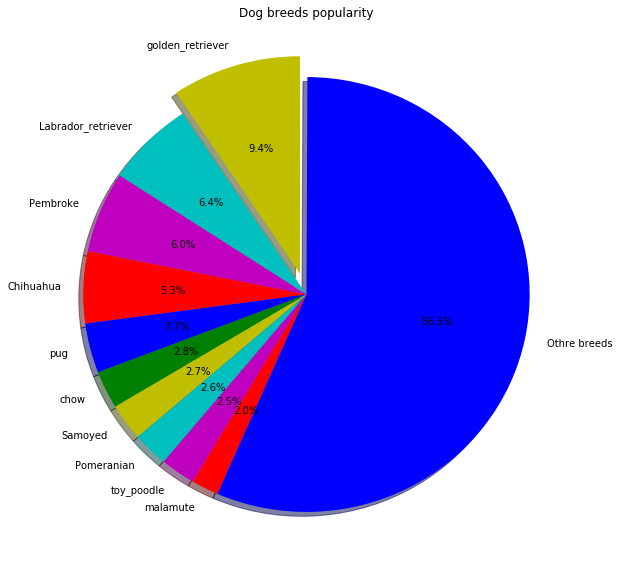

In [64]:
# Top ten dog breeds

# ploting a pie plot
slices = [dog_counts_dic[0], dog_counts_dic[1], dog_counts_dic[2],
          dog_counts_dic[3], dog_counts_dic[4], dog_counts_dic[5],
          dog_counts_dic[6], dog_counts_dic[7], dog_counts_dic[8], dog_counts_dic[9],dog_counts_dic[10:-1].sum()]
activities = list(dog_counts_dic.index[:10])
activities.append('Othre breeds')
cols = ['y','c','m','r','b','g']
 
plt.pie(slices, labels=activities, colors=cols, startangle=90, shadow= True, explode=(0.1,0,0,0,0,0,0,0,0,0,0), autopct='%1.1f%%')
 
plt.title('Dog breeds popularity')

# control fig size
fig = plt.gcf()
fig.set_size_inches(10, 10)

# save as png
plt.savefig("Dod_breeds_pie_chart.png", dpi=100) 



## insight 2 :What are the Most loved of each stage of dogs as per the special dog stage system of the twitter account?

In [65]:
Tweets_stats_df.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [66]:
average_dog_stage_retweets = Tweets_stats_df.groupby(['dog_stage']).retweet_count.mean()
average_dog_stage_favorite = Tweets_stats_df.groupby(['dog_stage']).favorite_count.mean()

average_dog_stage_favorite

dog_stage
doggo            19356.380952
doggo-floofer    17169.000000
doggo-pupper     13219.875000
doggo-puppo      47844.000000
floofer          13206.000000
pupper            7250.527363
puppo            21582.090909
Name: favorite_count, dtype: float64

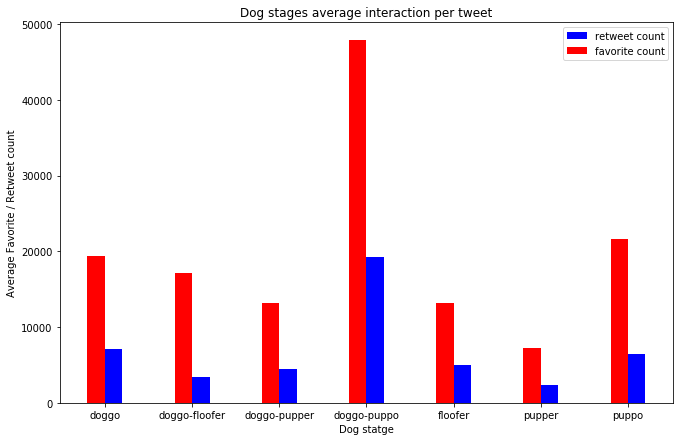

In [68]:
# ploting in terms of favorits and retweets

locations = np.array ([1,2,3,4,5,6,7])
plt.bar(locations+0.1, list(average_dog_stage_retweets), label="retweet count",color='b',width=0.2)
plt.bar(locations-0.1, list(average_dog_stage_favorite), label="favorite count", color='r',width=0.2)

plt.legend()
plt.xlabel('Dog statge')
plt.ylabel('Average Favorite / Retweet count')
plt.title('Dog stages average interaction per tweet')
plt.xticks(locations, list(average_dog_stage_favorite.index))

# control fig size
fig = plt.gcf()
fig.set_size_inches(11, 7)

# save as png
plt.savefig("Dog stages average interaction per tweet.png", dpi=100) 


## insight 3 :Interaction with the account over time.

In [69]:
Tweets_stats_df['month_year'] = pd.to_datetime(Tweets_stats_df.timestamp).dt.to_period('M')

In [70]:
average_monthly_retweets = Tweets_stats_df.groupby(['month_year']).retweet_count.mean()
average_monthly_favorits = Tweets_stats_df.groupby(['month_year']).favorite_count.mean()
max_monthly_followers = Tweets_stats_df.groupby(['month_year']).followers_count.max()

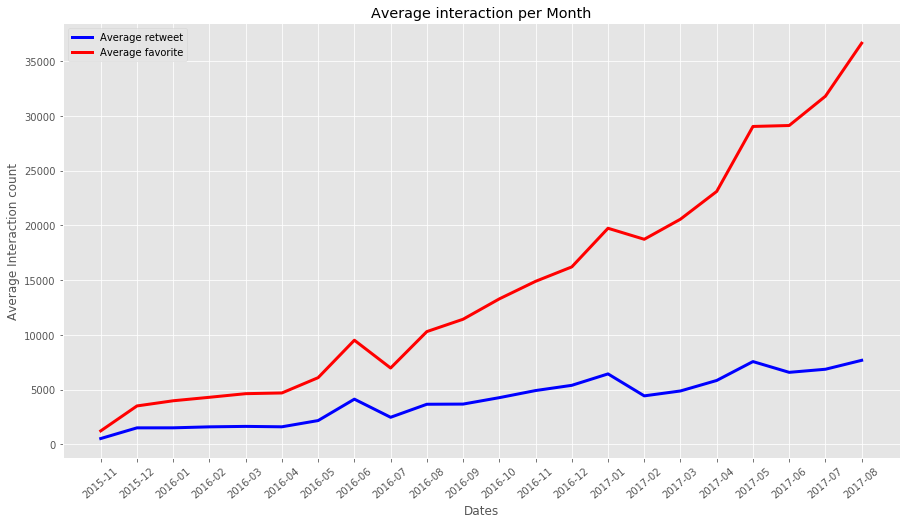

In [71]:
# ploting average favorits, retweets, and folowers monthly
style.use('ggplot')

Monthes = []
for x in range(1,len(average_monthly_retweets)+1):
    Monthes.append(x)
    
plt.plot(Monthes, list(average_monthly_retweets), label="Average retweet",color='b',linewidth=3)
plt.plot(Monthes, list(average_monthly_favorits), label="Average favorite", color='r',linewidth=3)
#plt.plot(Monthes, list(max_monthly_followers), label="Max followers", color='r',linewidth=3)

plt.xlabel('Dates')
plt.ylabel('Average Interaction count')
plt.title('Average interaction per Month')
plt.xticks(Monthes, list(average_monthly_favorits.index), rotation=40)
plt.legend()

# control fig size
fig = plt.gcf()
fig.set_size_inches(15, 8)

# save as png
plt.savefig("average interaction per tweet per month.png", dpi=100) 

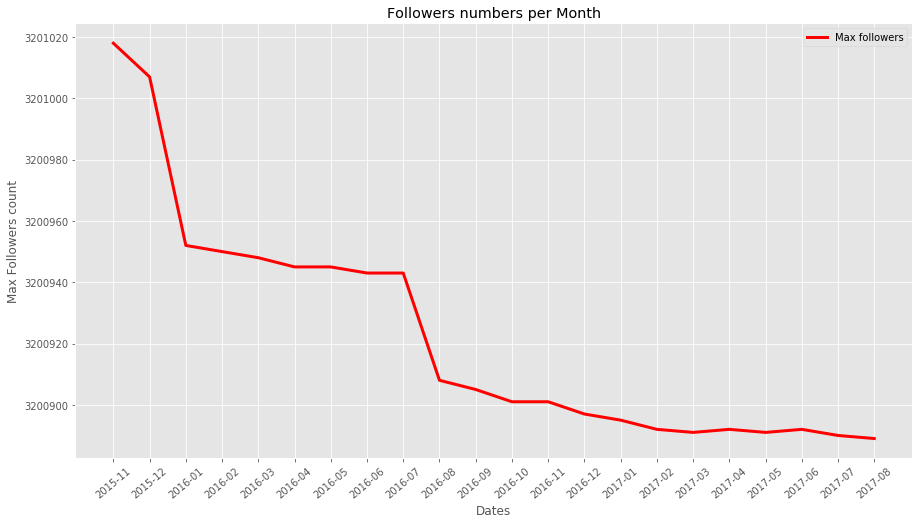

In [72]:
style.use('ggplot')
   
plt.plot(Monthes, list(max_monthly_followers), label="Max followers", color='r',linewidth=3)

plt.xlabel('Dates')
plt.ylabel('Max Followers count')
plt.title('Followers numbers per Month')
plt.xticks(Monthes, list(max_monthly_followers.index), rotation=40)
plt.legend()

# control fig size
fig = plt.gcf()
fig.set_size_inches(15, 8)

# save as png
#plt.savefig("Followers per month.png", dpi=100) 